# Iris Flowers Classification

#### The iris flowers dataset is an ideal choice for beginners who want to gain hands-on experience with supervised machine learning algorithms. It consists of numeric attributes, making it easier to load and manipulate the data. Additionally, the dataset's small size allows it to be stored in memory without the need for complex transformations or scaling operations..

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd

## Loading the dataset

In [2]:
df = pd.read_csv("D:\Iris-Flower-Classification-ML-Project\Iris_data.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns =["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.shape

(150, 5)

## Preprocessing the dataset

In [8]:
# checking the null values in the dataset
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

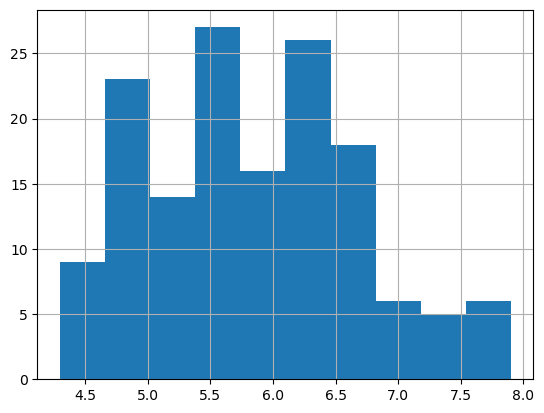

In [9]:
##histogram
df['SepalLengthCm'].hist()

<AxesSubplot:>

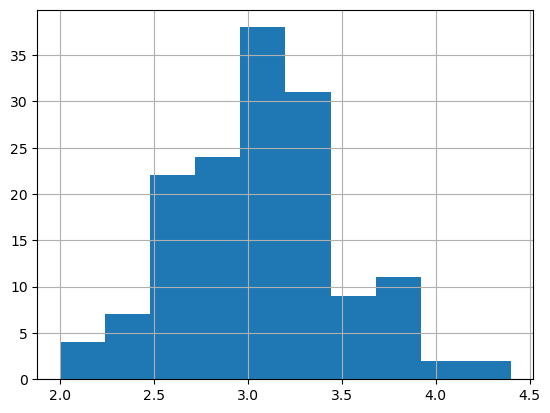

In [10]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

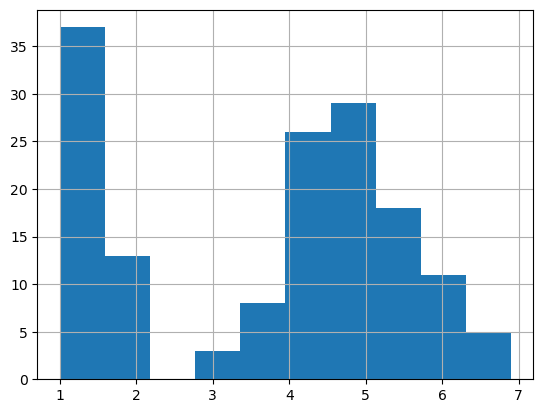

In [11]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

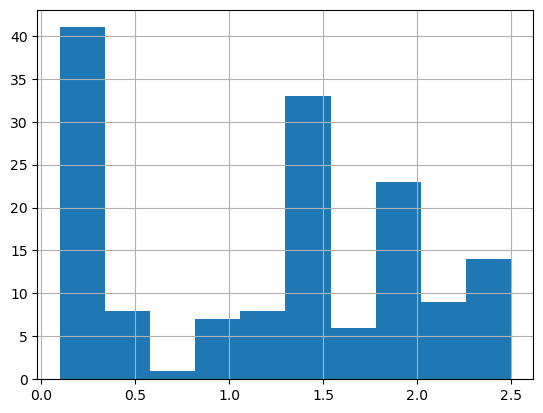

In [12]:
df['PetalWidthCm'].hist()

In [13]:
# Scatterplot
color = ['Orange','red','Blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

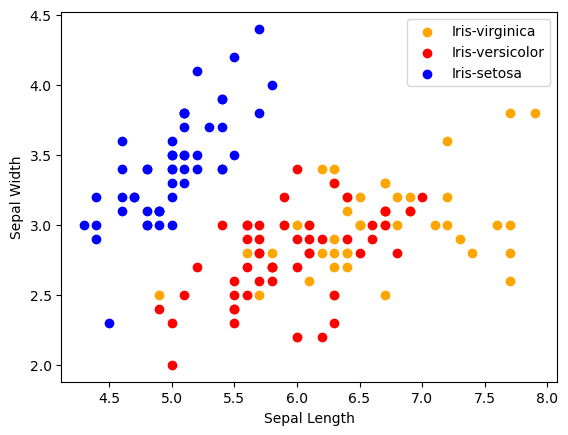

In [14]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

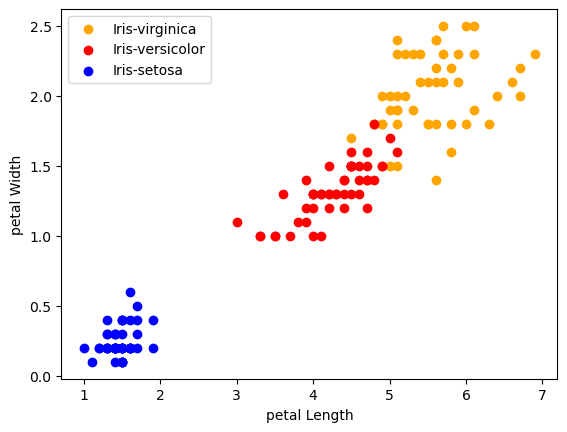

In [15]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

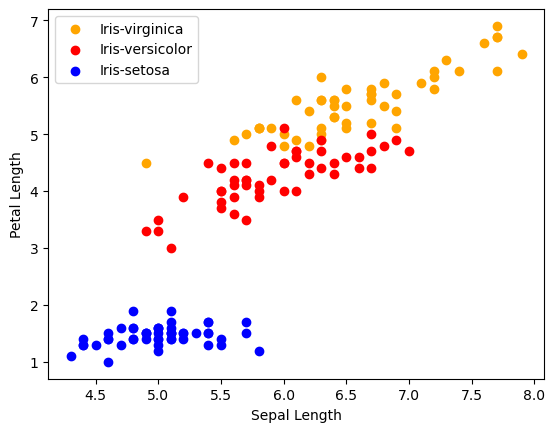

In [16]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

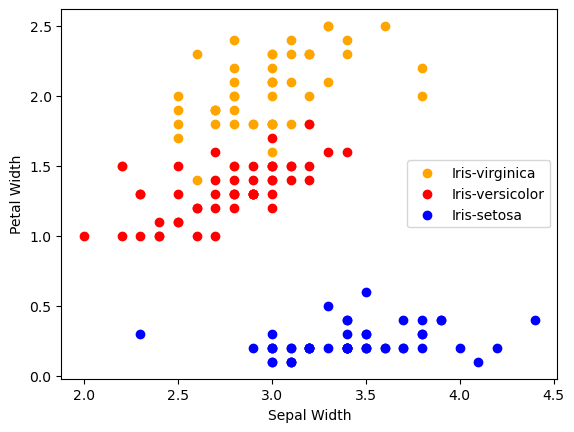

In [17]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Model Training

In [18]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["Species"])
Y = df['Species']
x_train, x_test,y_train, y_test = train_test_split(X ,Y ,test_size = 0.30)

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
model.fit(x_train, y_train)

LogisticRegression()

In [21]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  93.33333333333333


In [22]:
# knn - K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [23]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


C:\Users\Wahab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [26]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


### Received the accuracy of 93.33 in the test dataset in model.